### Download training dataset

In [1]:
from torchvision.datasets import MNIST

dataset = MNIST(root='data/', download=True)

In [2]:
len(dataset)

60000

### Download test dataset

In [3]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

View sample in training dataset

In [4]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

Display some of the dataset

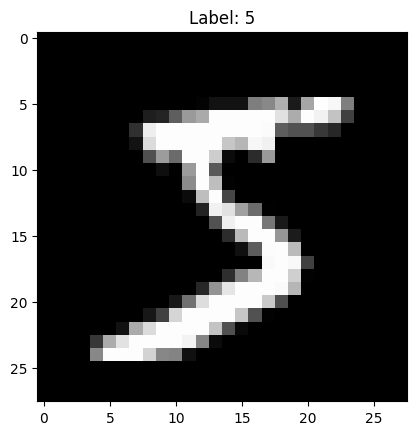

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

image, label = dataset[0]
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

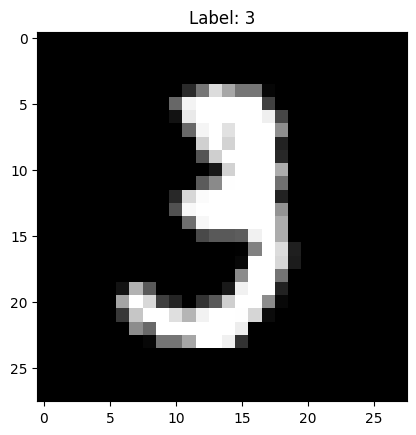

In [6]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

### Convert image into tensor using `transforms` function

In [7]:
import torchvision.transforms as transforms

dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())

In [8]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [9]:
import torch

print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


Display part of the image

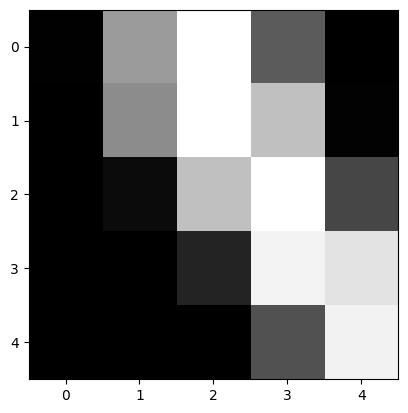

In [10]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')
plt.show()

## Set training, validation and test set

In [11]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds), len(test_dataset)

(50000, 10000, 10000)

Create data loader with batch

In [12]:
from torch.utils.data import DataLoader

batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

# Logistic Regression

Because the input are image with dimension 28x28, we need to convert into one dimensional array or vector

In [13]:
from torch import nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [14]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0050, -0.0067, -0.0018,  ...,  0.0217,  0.0040, -0.0174],
        [ 0.0285,  0.0351, -0.0336,  ..., -0.0195,  0.0027,  0.0119],
        [ 0.0334, -0.0117, -0.0200,  ..., -0.0240, -0.0105, -0.0101],
        ...,
        [-0.0061,  0.0082,  0.0347,  ..., -0.0324,  0.0050, -0.0128],
        [ 0.0342,  0.0183, -0.0047,  ...,  0.0081,  0.0249, -0.0339],
        [ 0.0321, -0.0042, -0.0045,  ..., -0.0067,  0.0127,  0.0343]],
       requires_grad=True)

In [15]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0067,  0.0153,  0.0348, -0.0280,  0.0016, -0.0298,  0.0017, -0.0025,
        -0.0023, -0.0331], requires_grad=True)

In [16]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images.reshape(-1, 28*28))
    print(outputs)
    break

tensor([2, 7, 1, 6, 3, 4, 0, 5, 0, 0, 0, 6, 9, 3, 7, 4, 4, 7, 8, 8, 7, 4, 9, 6,
        6, 8, 3, 0, 9, 1, 4, 5, 7, 5, 0, 8, 4, 6, 4, 0, 7, 8, 2, 9, 8, 7, 3, 7,
        1, 0, 7, 1, 2, 6, 5, 6, 0, 6, 3, 2, 4, 7, 3, 6, 6, 0, 7, 9, 4, 7, 9, 3,
        7, 6, 7, 1, 8, 6, 4, 7, 4, 4, 3, 8, 8, 1, 5, 5, 5, 9, 2, 1, 2, 0, 5, 1,
        4, 0, 7, 7, 2, 0, 9, 1, 6, 7, 1, 8, 1, 2, 3, 3, 5, 6, 7, 2, 6, 9, 5, 2,
        2, 6, 8, 8, 6, 5, 9, 0])
torch.Size([128, 1, 28, 28])
tensor([[ 0.2735,  0.2463, -0.2334,  ...,  0.1005, -0.3764, -0.2704],
        [-0.0281, -0.0970, -0.0224,  ..., -0.1999,  0.0469, -0.2059],
        [-0.0663, -0.0024,  0.0062,  ..., -0.2708, -0.2179, -0.0539],
        ...,
        [-0.1430,  0.1326, -0.1547,  ...,  0.0707, -0.0987, -0.4016],
        [ 0.1054,  0.2038, -0.1571,  ...,  0.1960, -0.0065, -0.0839],
        [-0.0926,  0.0387, -0.0479,  ...,  0.1837,  0.0389, -0.2196]],
       grad_fn=<AddmmBackward0>)


In [17]:
class MNISTModel(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        x = x.reshape(-1, 784)
        out = self.linear(x)
        return out

model = MNISTModel()

In [18]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0134, -0.0346,  0.0232,  ...,  0.0026,  0.0042, -0.0245],
         [-0.0080, -0.0299,  0.0339,  ..., -0.0307,  0.0248, -0.0132],
         [ 0.0113,  0.0256, -0.0124,  ...,  0.0014, -0.0318, -0.0047],
         ...,
         [ 0.0243, -0.0255,  0.0265,  ...,  0.0352, -0.0135,  0.0301],
         [-0.0051, -0.0092, -0.0147,  ...,  0.0209, -0.0320,  0.0152],
         [ 0.0319,  0.0229, -0.0315,  ..., -0.0192,  0.0148,  0.0298]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0343, -0.0069, -0.0207,  0.0244,  0.0143, -0.0157, -0.0207,  0.0339,
          0.0137, -0.0261], requires_grad=True)]

### Evaluation metrics and loss function

In [19]:
from torch.nn import functional as F

probs = F.softmax(outputs, dim=1)
print("Sample probabilities:\n", probs[:2].data)
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1421, 0.1383, 0.0856, 0.0918, 0.0978, 0.0800, 0.0882, 0.1195, 0.0742,
         0.0825],
        [0.1047, 0.0977, 0.1053, 0.0992, 0.1080, 0.0862, 0.1103, 0.0882, 0.1128,
         0.0876]])
Sum:  0.9999999403953552


In [20]:
import torch

max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([0, 8, 3, 3, 7, 8, 3, 4, 0, 7, 7, 3, 0, 0, 8, 6, 1, 0, 1, 7, 8, 0, 3, 3,
        4, 7, 0, 3, 7, 3, 1, 0, 0, 1, 7, 1, 8, 3, 0, 7, 1, 5, 1, 6, 0, 3, 6, 0,
        4, 1, 8, 6, 1, 1, 7, 3, 7, 6, 3, 1, 8, 6, 0, 3, 6, 7, 1, 6, 3, 3, 1, 7,
        4, 4, 8, 6, 1, 8, 4, 8, 1, 7, 8, 0, 7, 1, 1, 4, 0, 3, 1, 6, 3, 0, 3, 3,
        3, 7, 6, 0, 5, 7, 1, 6, 6, 4, 4, 2, 1, 0, 7, 3, 2, 6, 8, 0, 3, 1, 3, 3,
        6, 1, 7, 5, 7, 1, 1, 7])
tensor([0.1421, 0.1128, 0.1312, 0.1424, 0.1434, 0.1141, 0.1183, 0.1216, 0.1488,
        0.1485, 0.1545, 0.1215, 0.1152, 0.1173, 0.1206, 0.1193, 0.1238, 0.1111,
        0.1302, 0.1299, 0.1148, 0.1253, 0.1354, 0.1176, 0.1416, 0.1220, 0.1342,
        0.1459, 0.1267, 0.1241, 0.1274, 0.1232, 0.1175, 0.1258, 0.1730, 0.1210,
        0.1333, 0.1311, 0.1181, 0.1548, 0.1238, 0.1322, 0.1367, 0.1237, 0.1230,
        0.1156, 0.1180, 0.1221, 0.1237, 0.1293, 0.1171, 0.1175, 0.1467, 0.1443,
        0.1224, 0.1489, 0.1311, 0.1361, 0.1293, 0.1255, 0.1160, 0.1296, 0.1315,
       

In [21]:
def accuracy(y_pred, y_true):
    _, preds = torch.max(y_pred, dim=1)
    return torch.tensor(torch.sum(preds == y_true).item() / len(preds))

In [22]:
accuracy(outputs, labels)

tensor(0.0859)

In [23]:
loss_fn = F.cross_entropy
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3012, grad_fn=<NllLossBackward0>)


# Training loop

In [24]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = []

    for epoch in range(epochs):
        for batch in train_loader:
            # Calculate loss
            loss = model.training_step(batch)

            # Compute gradients
            loss.backward()

            # Update weights
            optimizer.step()

            # Reset gradients
            optimizer.zero_grad()

        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [25]:
class MNISTModel(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        x = x.reshape(-1, 784)
        out = self.linear(x)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch + 1, result['val_loss'], result['val_acc']))

model = MNISTModel()

In [26]:
result = evaluate(model, val_loader)
result

{'val_loss': 2.3459019660949707, 'val_acc': 0.05804984271526337}

In [27]:
history = fit(25, 1e-3, model, train_loader, val_loader)
history

Epoch [1], val_loss: 1.9760, val_acc: 0.5762
Epoch [2], val_loss: 1.7038, val_acc: 0.6849
Epoch [3], val_loss: 1.4997, val_acc: 0.7368
Epoch [4], val_loss: 1.3450, val_acc: 0.7651
Epoch [5], val_loss: 1.2258, val_acc: 0.7838


[{'val_loss': 1.9760212898254395, 'val_acc': 0.5762460231781006},
 {'val_loss': 1.7037664651870728, 'val_acc': 0.6849287748336792},
 {'val_loss': 1.4996790885925293, 'val_acc': 0.7368472814559937},
 {'val_loss': 1.3450490236282349, 'val_acc': 0.7651305198669434},
 {'val_loss': 1.2258471250534058, 'val_acc': 0.7838212251663208}]